In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### **Load the data**

In [3]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
labels =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_labels[0])               

9


**Rescale the image values to be in range [0, 1]**

In [6]:
train_images = train_images / 255.
test_images = test_images / 255.

**Display an image**

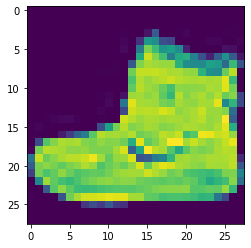

label: Ankle boot


In [7]:
i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

### **Define a model**


In [8]:
model = Sequential([
  Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=(3, 3)),
  Flatten(),
  Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


####**Compile Model**

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), tf.keras.metrics.MeanAbsoluteError()]
)

In [11]:
print(model.optimizer)
print(model.loss)
print(model.metrics)

[]


####**Train Model - Fit method**

```
Syntax:
history = # the progress of the network during training (ex. loss, metrics)
  model.fit(X_train,    # X_train shape (num_samples, num_features)
            y_train,    # y_train shape (num_samples, num_classes)
                        # for sparse_categorical: y_train shape (num_samples,) and need to use loss function sparse_categorical_crossentropy
            epochs=10,  # one epoch: training passes through whole dataset,
            batch_size, # batch_size: number of samples to work through before updating the internal model parameters.)
```

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
# make a dummy dimension
train_images[..., np.newaxis]
train_images.shape

(60000, 28, 28)

In [14]:
history = model.fit(train_images[..., np.newaxis], 
                    train_labels, 
                    epochs=8, 
                    batch_size=256,
                    verbose=2) 

Epoch 1/8
235/235 - 12s - loss: 0.5719 - sparse_categorical_accuracy: 0.7998 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 11s - loss: 0.3810 - sparse_categorical_accuracy: 0.8653 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 11s - loss: 0.3426 - sparse_categorical_accuracy: 0.8777 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 11s - loss: 0.3202 - sparse_categorical_accuracy: 0.8863 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 11s - loss: 0.3059 - sparse_categorical_accuracy: 0.8904 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 11s - loss: 0.2970 - sparse_categorical_accuracy: 0.8939 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 11s - loss: 0.2882 - sparse_categorical_accuracy: 0.8973 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 11s - loss: 0.2829 - sparse_categorical_accuracy: 0.8984 - mean_absolute_error: 4.4200


**Plot training history**

In [15]:
type(history)

tensorflow.python.keras.callbacks.History

In [16]:
# history.history

In [17]:
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.571853,0.799767,4.420000
1,0.380982,0.865267,4.420000
2,0.342584,0.877750,4.420000
3,0.320226,0.886350,4.419999
4,0.305890,0.890433,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

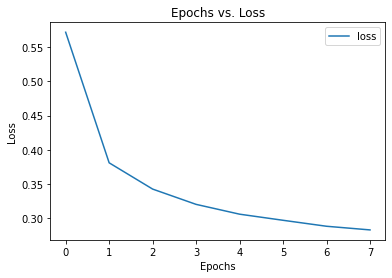

In [18]:
loss_plot = df.plot(y='loss', title='Epochs vs. Loss')
loss_plot.set(xlabel="Epochs", ylabel='Loss')

####**Evaluate on test set**

```
Syntax
loss, accuracy, mae = model.evaluate(X_test, y_test)
loss follow by list of metrics we defined at mode definition
```

In [19]:
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

313/313 - 1s - loss: 0.3252 - sparse_categorical_accuracy: 0.8814 - mean_absolute_error: 4.4200


####**Predict**

```
Syntax:
pred = model.predict(X_sample) # X_sample.shape = (num_samples, num_features)
```

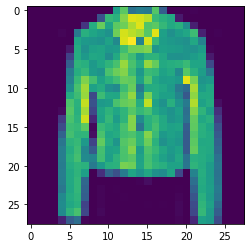

label = Coat


In [20]:
# choose an image from test set just for testing the prediction code
random_idx = np.random.choice(test_images.shape[0])
idx = 10

test_image = test_images[idx]
plt.imshow(test_image)
plt.show()
print(f'label = {labels[test_labels[idx]]}')

In [21]:
test_image.shape

(28, 28)

In [22]:
pred = model.predict(test_image[np.newaxis,..., np.newaxis])  # add np.newaxis to make dummy dimension
pred

array([[5.9775408e-05, 1.3835640e-05, 2.3934791e-02, 7.5824332e-06,
        9.4482565e-01, 5.6357795e-08, 3.1155914e-02, 7.6016735e-11,
        2.3383072e-06, 8.5168397e-09]], dtype=float32)

```
Since we have 10 classess, the prediction show the probability of each class. We will use the np.argmax to get the index of maximum probability
```

In [23]:
print(f'Mode prediction: {labels[np.argmax(pred)]}')

Mode prediction: Coat
